## **OpenCV**: Image Filtering and Thresholding

En este laboratorio, nuestro objetivo será aplicar técnicas de edición de imágenes: filtering usando convolutional kernels y global thresholding

# **Image Filtering using Convolutional Kernels**

**¿Qué es un convolutional kernel?**

Es una matriz de 2 dimensiones que se usa para hacer un filtro a una imagen. Tipicamente, el convolutional kernel es matriz cuadrada de MxN, donde tanto M como N son números enteros impares. Estas matrices se pueden utilizar para realizar operaciones matemáticas en cada píxel de una imagen, con el objetivo de lograr el efecto deseado (como desenfocar o enfocar una imagen).

**¿Por qué querriamos desenfocar una imagen?**

Porque reduce ciertos tipos de ruido en una imagen. Por esta razón, a la difuminación se le suele denominar suavizado.
Para eliminar un fondo que distraiga, puede desenfocar intencionalmente partes de una imagen, como se hace en el modo "Retrato" en las cámaras de los dispositivos móviles.

**¿Y cómo se usan estos kernels?**

El filtrado de una imagen de origen se logra convolucionando el kernel con la imagen. En términos simples, la convolución de una imagen con un kernel representa una operación matemática simple entre el kernel y sus elementos correspondientes en la imagen.

**¿Y cómo lo hago?**

1.   Supongamos que el centro del kernel está colocado sobre un píxel específico (p) en una imagen.
2.   Multiplique el valor de cada elemento en el núcleo, con el elemento de píxel correspondiente (es decir, su intensidad de píxel) en la imagen de origen.
3.   Suma el resultado de esas multiplicaciones y calcula el promedio.
4.   Finalmente, reemplace el valor del píxel (p) con el valor promedio que acaba de calcular.




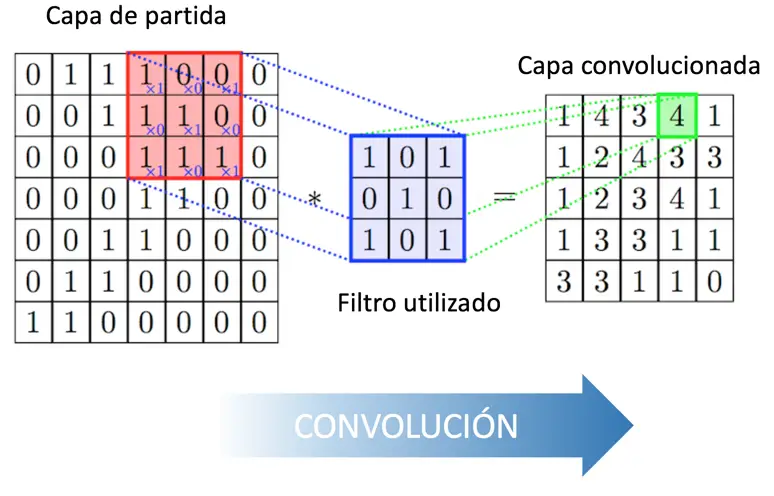

# Identity Kernel

La kernel de identidad es una matriz cuadrada, donde el elemento del medio es 1 y todos los demás elementos son cero. Lo que hace que una matriz identidad sea especial es que al multiplicarla por cualquier otra matriz se obtendrá la matriz original.

1.   Aplicar un kernel de identidad a una imagen cualquiera

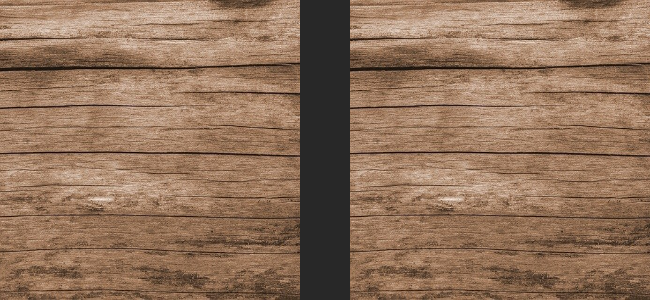

In [9]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

#un espacio pa poner las imagenes una al lado de la otra
space = np.ones((300, 50, 3), dtype=np.uint8) * 40

image = cv2.imread('test.jpg')
image = cv2.resize(image, (300, 300))

if image is None:
    print('Could not read image')

kernel1 = np.array([[0, 0, 0],
                    [0, 1, 0],
                    [0, 0, 0]])

identity = cv2.filter2D(src=image, ddepth=-1, kernel=kernel1)

cv2_imshow(cv2.hconcat([image, space, identity])) #el hconcat permite mostrar las imagenes de forma horizontal en el google colab

Al aplicar la matriz identidad, la imagen con filtro pareciera ser similar a la original.

2.   Aplicar un kernel personalizado a la misma imagen y ver las diferencias

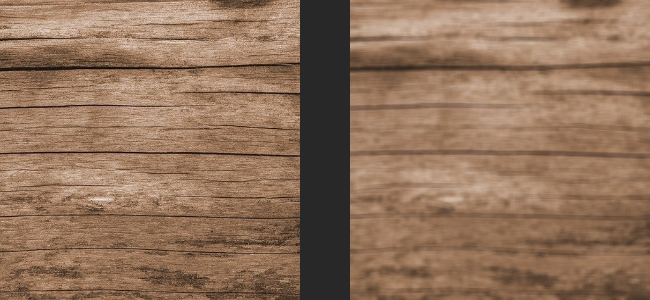

In [12]:
kernel2 = np.ones((5, 5), np.float32) / 25
img = cv2.filter2D(src=image, ddepth=-1, kernel=kernel2)

cv2_imshow(cv2.hconcat([image, space, img]))

**NOTA**: Al hacer un kernel personalizado, debes asegurarte de que todos los valores estén normalizados. Esto se hace dividiendo cada elemento del kernel por el número de elementos total del mismo.

3.   Utiliza la función *blur()* para desenfocar una imagen cualquiera



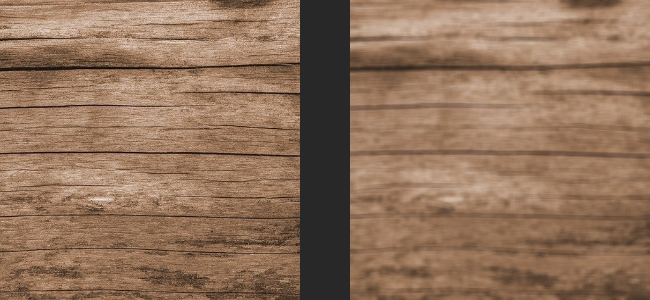

In [20]:
img_blur = cv2.blur(src=image, ksize=(5,5))

cv2_imshow(cv2.hconcat([image, space, img_blur]))

4.   Aplica un desenfoque gaussiano a una imagen cualquiera.

*Un desenfoque gaussiano realiza un promedio ponderado, a diferencia del promedio uniforme descrito en el primer ejemplo. En este caso, el desenfoque gaussiano pondera los valores de los píxeles en función de su distancia desde el centro del kernel. Los píxeles más alejados del centro tienen menos influencia en el promedio ponderado.*

*src = imagen, ksize = tamaño del kernel, sigmaX = Desviación estándar gaussiana en X, sigmaY = Desviación estándar gaussiana en Y*

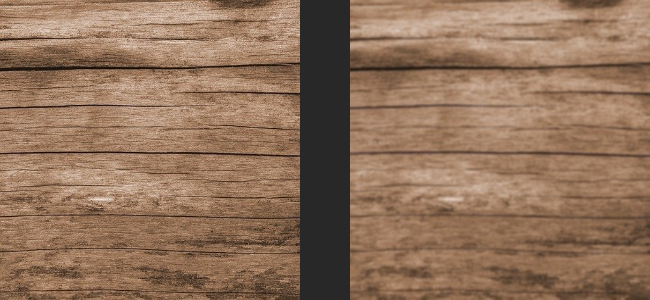

In [55]:
gaussian_blur = cv2.GaussianBlur(src=image, ksize=(5,5),sigmaX=0, sigmaY=0)

cv2_imshow(cv2.hconcat([image, space, gaussian_blur]))

5. Aplicar desenfoque mediano a una imagen cualquiera

*En el desenfoque mediano, cada píxel de la imagen de origen se reemplaza por el valor mediano de los píxeles de la imagen en el área del kernel*

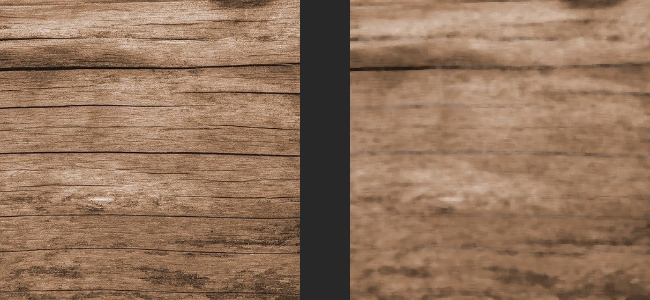

In [ ]:
median = cv2.medianBlur(src=image, ksize=5)

cv2_imshow(cv2.hconcat([image, space, median]))

6. Enfoca una imagen cualquiera con un kernel personalizado y la función *filter2D()*

**NOTA:** en esta [página](https://en.wikipedia.org/wiki/Kernel_(image_processing)) pueden encontrar los kernels más utilizados

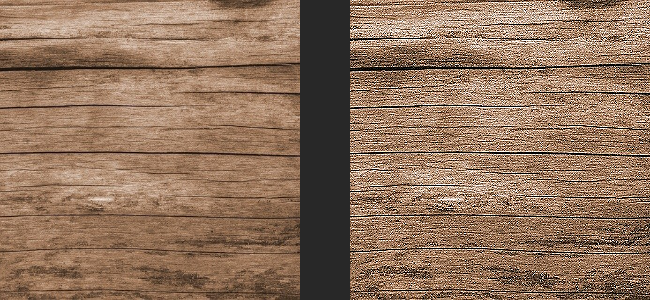

In [21]:
kernel3 = np.array([[0, -1,  0],
                   [-1,  5, -1],
                    [0, -1,  0]])

sharp_img = cv2.filter2D(src=image, ddepth=-1, kernel=kernel3)

cv2_imshow(cv2.hconcat([image, space, sharp_img]))

# Filtrado Lateral

Si bien el desenfoque puede ser una forma eficaz de reducir el ruido en una imagen, a menudo no es deseable desenfocar toda la imagen, ya que se pueden perder detalles importantes y bordes nítidos.

Esta técnica aplica el filtro de forma selectiva para desenfocar píxeles de intensidad similar en un vecindario. Siempre que sea posible, se conservan los bordes afilados.

Tambien permite controlar no sólo el tamaño espacial del filtro, sino también el grado en que los píxeles vecinos se incluyen en la salida filtrada. Esto se hace en función de la variación en la intensidad del color y también de la distancia desde el píxel filtrado.

El filtrado bilateral esencialmente aplica un desenfoque gaussiano (ponderado) 2D a la imagen, al mismo tiempo que considera la variación en las intensidades de los píxeles vecinos para minimizar el desenfoque de los bordes cercanos (que deseamos preservar). Lo que esto significa es que la forma del kernel, en realidad, depende del contenido de la imagen local, en cada ubicación de píxel.

**Ejemplo:** Supongamos que está filtrando una región en una imagen, cerca de un borde. Un filtro de desenfoque gaussiano simple desenfocaría el borde porque se encuentra cerca de la región filtrada (cerca del centro del filtro gaussiano).  Pero el filtro bilateral puede detectar el borde, porque también considera las diferencias en las intensidades de los píxeles. Por lo tanto, calculará un peso mucho menor para los píxeles que se encuentran a ambos lados del borde, reduciendo así su influencia en la región filtrada. Las regiones de intensidad más uniforme se ven más borrosas, ya que no están asociadas con bordes fuertes.



El valor final (ponderado) de un píxel en la imagen filtrada es producto de su peso espacial y de intensidad.



*   Los píxeles que sean similares y estén cerca del píxel filtrado tendrán influencia.
*   Los píxeles que están lejos del píxel filtrado tendrán poca influencia (debido al gaussiano espacial).
*   Los píxeles que tienen intensidades diferentes tendrán poca influencia (debido a la intensidad del color gaussiana), incluso si están cerca del centro del kernel.




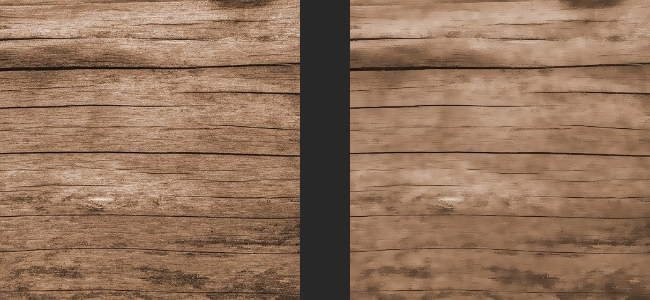

In [22]:
# sigmaColor se utiliza para filtrar sigma en el espacio de color.
# sigmaSpace se utiliza para filtrar sigma en el espacio de coordenadas.
bilateral_filter = cv2.bilateralFilter(src=image, d=9, sigmaColor=75, sigmaSpace=75)

cv2_imshow(cv2.hconcat([image, space, bilateral_filter]))

# Global Thresholding

Cuando el thresholding se aplica por igual a cada píxel de la imagen y el valor de umbral es fijo, las operaciones se denominan globales.

Los algoritmos de global thresholding toman una **imagen de origen** (*src* ) y un **thresholding** (*thresh* ) como entrada, y producen una **imagen de salida** (*dst* ), comparando la intensidad de los píxeles en la ubicación del píxel de origen (x,y) con el thresholding. Si *src (x,y)* > *thresh*, entonces a *dst (x,y)* se le asigna algún valor. De lo contrario, a *dst (x,y)* se le asigna algún otro valor.

Además de la *src* y el *thresh*, se necesita otro parámetro de entrada llamado **valor máximo** (*maxValue* ).

Si *src (x,y)* es mayor que *thresh*, la operación de thresholding establece el valor del píxel de la imagen de destino *dst (x,y)* en *maxValue*. En caso contrario lo pone a 0.

Veamos 5 tipos de thresholding diferentes:

**1.   Binary Thresholding**

Este es el tipo de thresholding más común y simple.

In [ ]:
# Binary Threshold
# if src(x,y) > thresh
#   dst(x,y) = maxValue
# else
#   dst(x,y) = 0

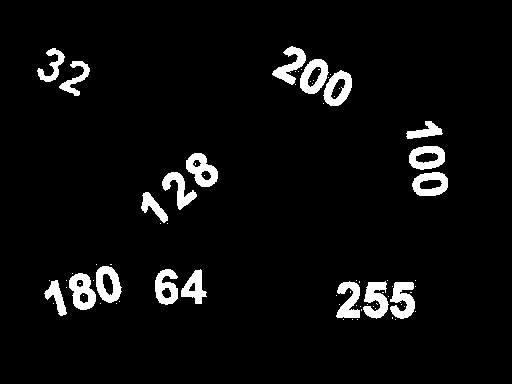

In [34]:
import cv2

src = cv2.imread("threshold.png", cv2.IMREAD_GRAYSCALE)

# Threshold and maxValue
thresh = 20
maxValue = 255

th, dst = cv2.threshold(src, thresh, maxValue, cv2.THRESH_BINARY);

cv2_imshow(dst)

**TAREA:** Cambien los valores de Thresh y MaxValue hasta obtener solo 4 numeros en la imagen.

**2.   Inverse-Binary Thresholding**

Lo mismo que el de arriba pero al revés

In [ ]:
# Inverse Binary Threshold
# if src(x,y) > thresh
#   dst(x,y) = 0
# else
#   dst(x,y) = maxValue

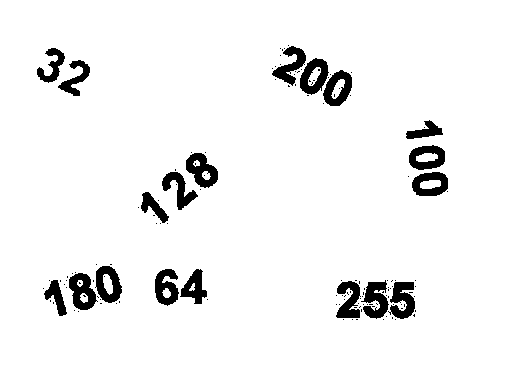

In [36]:
# Threshold and maxValue
thresh = 15
maxValue = 255

th, dst = cv2.threshold(src, thresh, maxValue, cv2.THRESH_BINARY_INV)

cv2_imshow(dst)

**3.   Truncate Thresholding**

El píxel de destino se establece en el thresholding, si el valor del píxel de origen es mayor que el *thresh*. De lo contrario, se establece en el valor del píxel de origen. Se ignora el *MaxValue*.

In [ ]:
# Truncate Threshold
# if src(x,y) > thresh
#   dst(x,y) = thresh
# else
#   dst(x,y) = src(x,y)

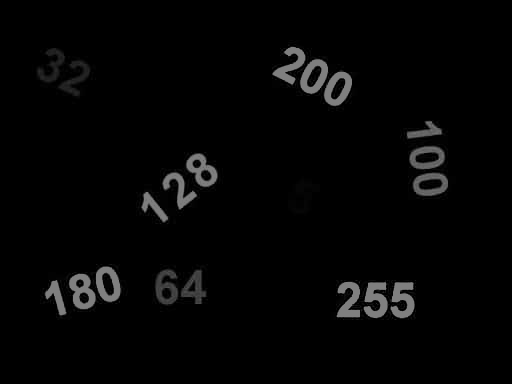

In [46]:
# Threshold and maxValue
thresh = 127
# maxValue = 255

th, dst = cv2.threshold(src, thresh, maxValue, cv2.THRESH_TRUNC)

cv2_imshow(dst)

**4.   Threshold to Zero**

El valor del píxel de destino se establece en el valor del píxel de la fuente correspondiente, si el valor del píxel de origen es mayor que el *thresh*. De forma contraria, se establece en 0. Se ignora el *MaxValue*.

In [ ]:
# Threshold to Zero
# if src(x,y) > thresh
#   dst(x,y) = src(x,y)
# else
#   dst(x,y) = 0

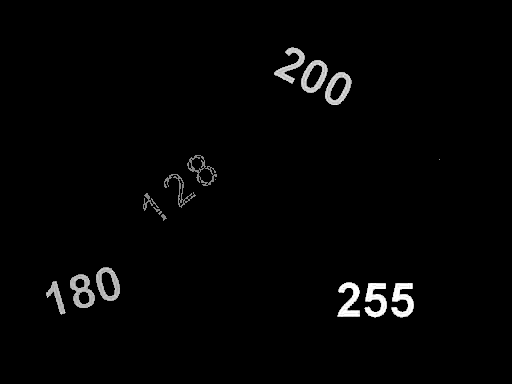

In [49]:
# Threshold and maxValue
thresh = 127
# maxValue = 255

th, dst = cv2.threshold(src, thresh, maxValue, cv2.THRESH_TOZERO)

cv2_imshow(dst)

**5.  Inverted Threshold to Zero**

El valor del píxel de destino se establece en 0 si el valor del píxel de origen es mayor que el *thresh*. De lo contrario, se establece en el valor del píxel de origen. Se ignora el *MaxValue*

In [ ]:
# Inverted Threshold to Zero
# if src(x,y) > thresh
#   dst(x,y) = 0
# else
#   dst(x,y) = src(x,y)

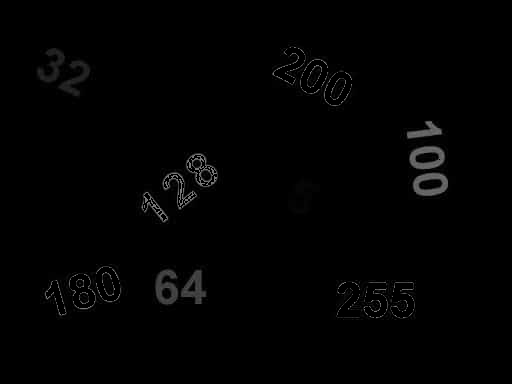

In [53]:
# Threshold and maxValue
thresh = 127
# maxValue = 255

th, dst = cv2.threshold(src, thresh, maxValue, cv2.THRESH_TOZERO_INV)

cv2_imshow(dst)